In [1]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2015-07-14 11:39:36--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net... 54.192.55.192, 54.192.54.198, 54.192.54.164, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|54.192.55.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: 'SRR835775_1.first1000.fastq'

SRR835775_1.first10 100%[=====================>] 219.52K   864KB/s   in 0.3s   

2015-07-14 11:39:36 (864 KB/s) - 'SRR835775_1.first1000.fastq' saved [224786/224786]



In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [3]:
# ord(x) converts int to char according to the ASCII table
def phred33ToQ(qual):
    return ord(qual) - 33


def QtoPhred33(Q):
    return char(Q + 33)

In [4]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


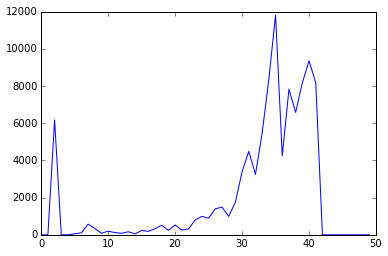

In [5]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

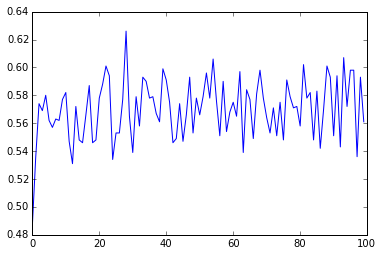

In [6]:
# The GC content, in other words, the fraction of the genome that contains G's or C's, differs from species to species.
# So different species will have different characteristic GC contents. Here though, we're really just using GC as a way of trying
# to figure out whether the mix of different bases is changing as we move along the read. We expect that it won't change very much.

# But if something strange is going on, like if there was one particularly bad sequencing cycle, then we might see a very
# different mix of G's and C's relative to the other bases. So we just want to plot that for the entire read and just
# check to see whether anything strange is happening.

def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

# Yeah, we're not looking at very many sequencing reads here, so its not surprising that the fraction kind of jumps around a bit,
# But one thing you can see is that its consistently higher than 0.5. that's because the human genome, has GC content, on average, greater than a half.

In [7]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

# N is basically when the base caller has no confidence. It doesn't even want to make a call,
# because there's no good evidence to support one base over the others.

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})